In [1]:
#CONTINUOUS PROBABILITY DISTRIBUTION

In [2]:
import pandas as pd
import numpy as np

In [3]:
#UNIFORM DISTRIBUTION

In [4]:
low = 1
high = 10
count = 10

u = pd.Series(
    np.random.uniform(low, high, count)
)

u.head()

0    8.011643
1    9.537871
2    6.193270
3    7.065749
4    4.280454
dtype: float64

In [5]:
u.describe()

count    10.000000
mean      5.489181
std       2.361350
min       2.171454
25%       3.783570
50%       5.592031
75%       6.871446
max       9.537871
dtype: float64

In [6]:
from scipy.stats import uniform

uniform.rvs(size = 10) #Between 0 and 1


array([0.34490982, 0.09836602, 0.83236591, 0.44716272, 0.30460262,
       0.32617995, 0.78596734, 0.51068905, 0.19563124, 0.59644481])

In [7]:
arr = np.linspace(0, 1, 5) #start, stop, count->bins
arr

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [8]:
df = pd.DataFrame({
    'x' : arr,
    'y' : [uniform.pdf(i) for i in arr]
})

df

,x,y
0,0.00,1.0
1,0.25,1.0
2,0.50,1.0
3,0.75,1.0
4,1.00,1.0


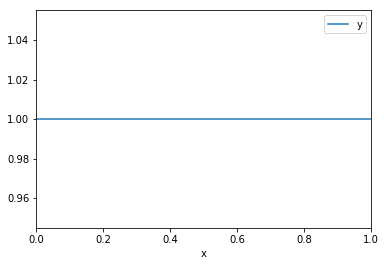

In [10]:
df.set_index('x').plot(kind = 'line')

In [13]:
df['p'] = df['x'].apply(lambda x: uniform.cdf(x))
df

,x,y,p
0,0.00,1.0,0.00
1,0.25,1.0,0.25
2,0.50,1.0,0.50
3,0.75,1.0,0.75
4,1.00,1.0,1.00


In [14]:
#NORMAL DISTRIBUTION

In [15]:
n = pd.Series(
    np.random.normal(10, 1, 1000) # mean, std, count
)

n.head()

0     9.343028
1     9.225527
2    10.022894
3    10.836063
4    11.781196
dtype: float64

In [16]:
n.describe()

count    1000.000000
mean       10.082075
std         0.997829
min         6.676731
25%         9.402251
50%        10.139540
75%        10.766928
max        13.025506
dtype: float64

In [17]:
n.median()

10.139539844701048

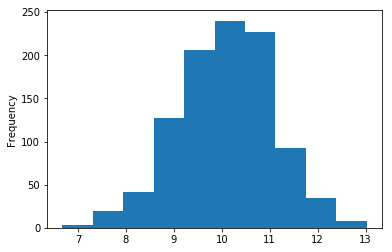

In [23]:
n.plot(kind = 'hist', bins = 100)

In [24]:
#68 - 95 - 99.7 ->SIGMA RULE NORMAL DISTRIBUTION

In [29]:
mu = n.mean()
sigma = n.std()

len([x for x in n if (mu - 2*sigma) < x < (mu + 2*sigma)])/1000

0.954

In [30]:
len([x for x in n if (mu - 3*sigma) < x < (mu + 3*sigma)])/1000

0.998

In [31]:
#SCIPY norm

In [32]:
from scipy.stats import norm

df2 = pd.DataFrame({
    'x': np.linspace(9, 11, 9) #low, high, count
})

df2

,x
0,9.00
1,9.25
2,9.50
3,9.75
4,10.00
5,10.25
6,10.50
7,10.75
8,11.00


In [33]:
df2.describe()

,x
count,9.000000
mean,10.000000
std,0.684653
min,9.000000
25%,9.500000
50%,10.000000
75%,10.500000
max,11.000000


In [35]:
df2['x'].median()

10.0

In [41]:
df2['y'] = df2['x'].apply(lambda x: norm.pdf(x, df2['x'].mean())) #value, mean

df2

,x,y
0,9.00,0.241971
1,9.25,0.301137
2,9.50,0.352065
3,9.75,0.386668
4,10.00,0.398942
5,10.25,0.386668
6,10.50,0.352065
7,10.75,0.301137
8,11.00,0.241971


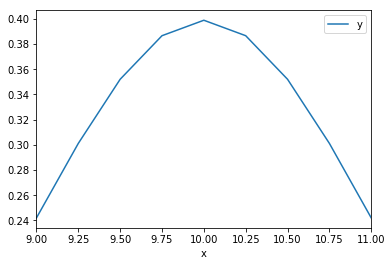

In [40]:
df2.set_index('x').plot(kind = 'line')

In [44]:
#PROBABILITY OF A CONTINUOS DESTRIBUTION

norm.cdf(10, df2['x'].mean()) #val, mean

0.5

In [50]:
df2['cpf'] = df2['x'].apply(lambda x: norm.cdf(x, df2['x'].mean()))

df2 #mistakenly made a coloum name 'p'

,x,y,p,cpf
0,9.00,0.241971,0.158655,0.158655
1,9.25,0.301137,0.226627,0.226627
2,9.50,0.352065,0.308538,0.308538
3,9.75,0.386668,0.401294,0.401294
4,10.00,0.398942,0.500000,0.500000
5,10.25,0.386668,0.598706,0.598706
6,10.50,0.352065,0.691462,0.691462
7,10.75,0.301137,0.773373,0.773373
8,11.00,0.241971,0.841345,0.841345


In [51]:
# EXPONENTIAL DISTRIBUTION

In [52]:
e = pd.Series(
    np.random.exponential(10, 1000)  #mean, count
)

e.head()

0    26.493513
1    14.980908
2     7.062728
3     5.858701
4    10.175889
dtype: float64

In [53]:
e.describe()

count    1000.000000
mean       10.232809
std        10.785095
min         0.019661
25%         3.033069
50%         7.210507
75%        14.059607
max       121.652019
dtype: float64

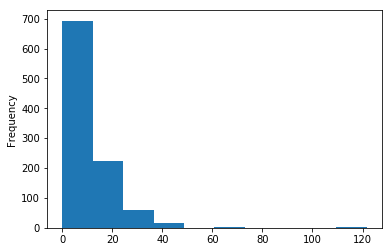

In [54]:
e.plot(kind = 'hist')

In [55]:
#SCIPY expon

In [59]:
df3 = pd.DataFrame({
    'x' : [i for i in range(11)]
})
df3

,x
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [60]:
from scipy.stats import expon

df3['y'] = df3['x'].apply(lambda x: expon.pdf(x))

df3.head()

,x,y
0,0,1.000000
1,1,0.367879
2,2,0.135335
3,3,0.049787
4,4,0.018316


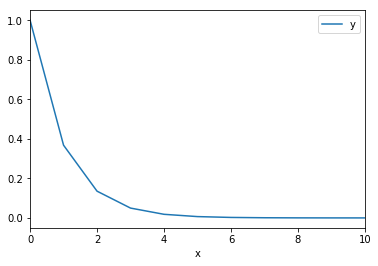

In [63]:
df3.set_index('x').plot(kind = 'line')

In [64]:
expon.pdf(5, scale = 4) #target, mean -> default is 1

0.07162619921504752

In [65]:
#SCIPY expon.cdf ->for a range

In [66]:
df3['cdf'] = df3['x'].apply(lambda x: expon.cdf(x, scale = 4))

df3.head()

,x,y,cdf
0,0,1.000000,0.000000
1,1,0.367879,0.221199
2,2,0.135335,0.393469
3,3,0.049787,0.527633
4,4,0.018316,0.632121


In [67]:
#WITH AVERAGE OF 4:

In [69]:
expon.cdf(5, scale = 4) #target, mean

0.7134952031398099